In [ ]:
#now using z score technique to see the outliers
# and also to remove them


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("/content/travel-times.csv")

In [36]:
df.sample(5)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
54,11/15/2011,17:36,Tuesday,Home,51.06,122.8,61.4,70.9,9.53,49.9,43.2,No,Backed up at Bronte
66,11/4/2011,12:12,Friday,Home,51.03,128.4,82.2,89.7,9.35,37.2,34.1,No,NaN
192,7/25/2011,08:06,Monday,GSK,48.32,121.2,63.4,78.4,8.45,45.7,37.0,No,NaN
75,10/28/2011,12:14,Friday,Home,51.28,120.5,83.0,89.5,8.32,37.1,34.4,No,NaN
184,7/29/2011,08:22,Friday,GSK,49.07,121.1,73.2,77.7,8.45,40.2,37.9,No,Empty roads


In [38]:
df.columns

Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime', 'MovingTime',
       'Take407All', 'Comments'],
      dtype='object')

In [42]:
sam=df.drop(columns=['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'TotalTime', 'MovingTime',
       'Take407All', 'Comments','FuelEconomy'])

In [43]:
sam.isnull().sum()

,0
Distance,0
MaxSpeed,0
AvgSpeed,0
AvgMovingSpeed,0


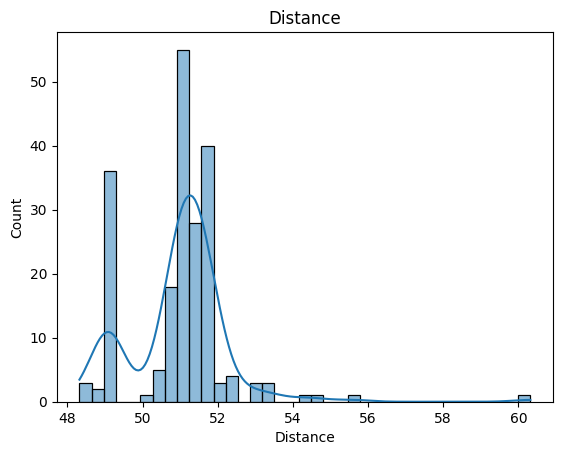

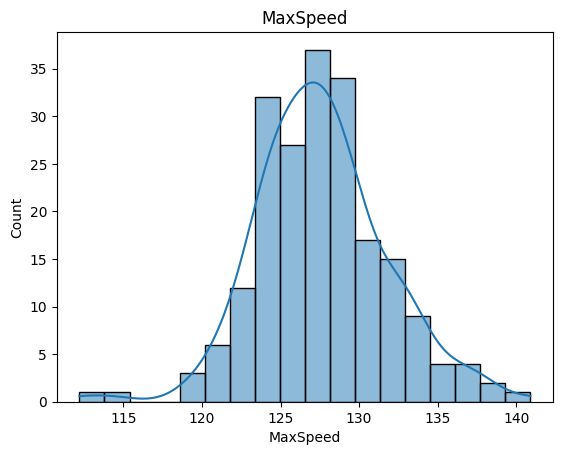

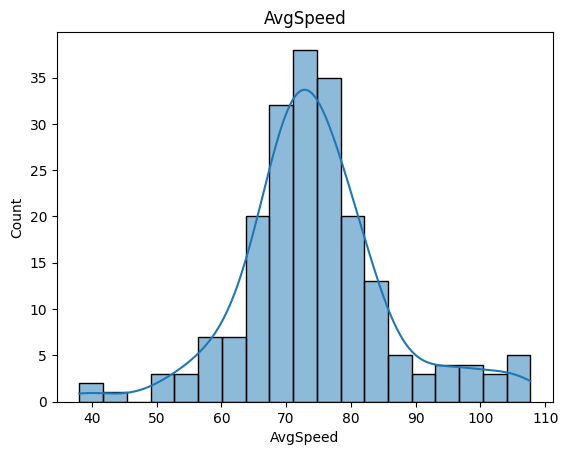

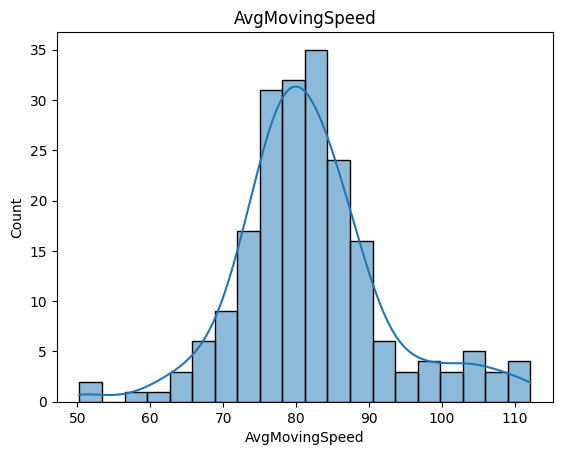

In [44]:
for i in sam.columns:
  sns.histplot(df[i],kde=True,fill=True)
  plt.title(i)
  plt.show()

In [46]:
# lets work distance
sam_cg_std=sam['Distance'].std()
sam_cg_mean=sam['Distance'].mean()

print("std=",sam_cg_std," \n\nmean =",sam_cg_mean)

std= 1.3212053157515522  

mean = 50.981512195121944


In [49]:
# now the formluae of z score
sam['z_distance']=(df['Distance']-sam_cg_mean)/sam_cg_std

sam

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,z_distance
0,51.29,127.4,78.3,84.8,0.233490
1,51.63,130.3,81.8,88.9,0.490830
2,51.27,127.4,82.0,85.8,0.218352
3,49.17,132.3,74.2,82.9,-1.371106
4,51.15,136.2,83.4,88.1,0.127526
...,...,...,...,...,...
200,54.52,125.6,49.9,82.4,2.678227
201,50.90,123.7,76.2,95.1,-0.061695
202,51.96,132.6,57.5,76.7,0.740602
203,53.28,125.8,61.6,87.6,1.739690


In [64]:
outliers= sam[(sam['z_distance']>1.5) | (sam['z_distance']<-1.5)]
outliers

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,z_distance
44,60.32,129.4,68.9,74.6,7.068158
94,48.94,130.8,85.7,93.2,-1.545189
134,54.36,132.5,95.1,98.0,2.557126
165,55.57,127.7,69.6,77.1,3.472956
168,48.99,125.5,68.3,79.5,-1.507345
170,48.98,124.8,72.8,78.8,-1.514914
182,53.48,124.9,68.8,78.8,1.891067
188,48.82,124.5,70.4,77.8,-1.636015
192,48.32,121.2,63.4,78.4,-2.014458
195,48.35,129.3,81.5,89.0,-1.991751


In [65]:
#solving by doing trimming

sam_trimmed=sam[(sam['z_distance']<1.5) & (sam['z_distance']>-1.5)]
sam_trimmed

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,z_distance
0,51.29,127.4,78.3,84.8,0.233490
1,51.63,130.3,81.8,88.9,0.490830
2,51.27,127.4,82.0,85.8,0.218352
3,49.17,132.3,74.2,82.9,-1.371106
4,51.15,136.2,83.4,88.1,0.127526
...,...,...,...,...,...
198,51.16,126.7,92.2,102.6,0.135095
199,50.96,124.3,82.3,96.4,-0.016282
201,50.90,123.7,76.2,95.1,-0.061695
202,51.96,132.6,57.5,76.7,0.740602


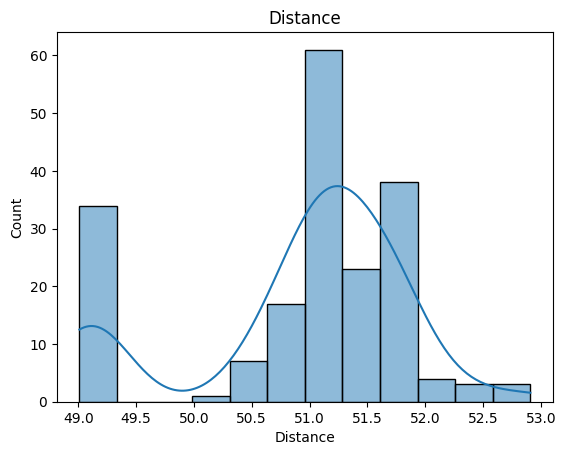

In [66]:
  sns.histplot(sam_trimmed['Distance'],kde=True,fill=True)
  plt.title('Distance')
  plt.show()

In [67]:
#capping and replacinng
upeer_limit=sam_cg_mean+3*sam_cg_std
lower_limit=sam_cg_mean-3*sam_cg_std

print("upeer limit=",upeer_limit,"\n\nlower limit=",lower_limit)



upeer limit= 54.9451281423766 

lower limit= 47.017896247867284


In [72]:
sam['Distance']=np.where(sam['Distance']>upeer_limit,upeer_limit
                         ,np.where(sam['Distance']<lower_limit,lower_limit,sam['Distance']))
sam['z_distance']=np.where(sam['z_distance']>3,3
                         ,np.where(sam['z_distance']<-3,-3,sam['z_distance']))

In [70]:
sam

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,z_distance
0,51.29,127.4,78.3,84.8,0.233490
1,51.63,130.3,81.8,88.9,0.490830
2,51.27,127.4,82.0,85.8,0.218352
3,49.17,132.3,74.2,82.9,-1.371106
4,51.15,136.2,83.4,88.1,0.127526
...,...,...,...,...,...
200,54.52,125.6,49.9,82.4,2.678227
201,50.90,123.7,76.2,95.1,-0.061695
202,51.96,132.6,57.5,76.7,0.740602
203,53.28,125.8,61.6,87.6,1.739690


In [76]:
print(sam['Distance'].max(),"\n\n",sam['Distance'].min())

54.9451281423766 

 48.32


In [77]:
print(sam['z_distance'].max(),"\n\n",sam['z_distance'].min())

3.0 

 -2.014457679961705


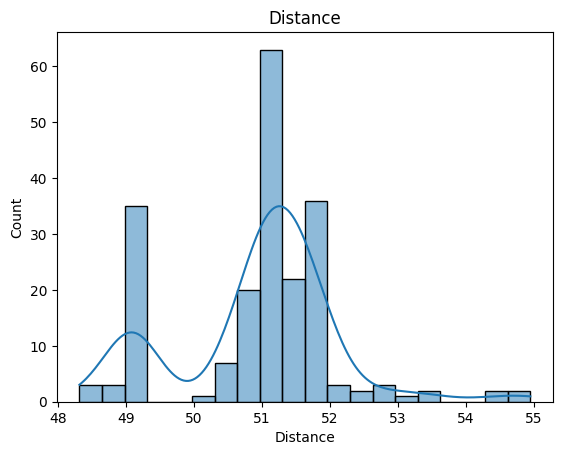

In [78]:
sns.histplot(sam['Distance'],kde=True,fill=True)
plt.title('Distance')
plt.show()